In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
from plotly import express as px
import string
from wordcloud import WordCloud
import numpy as np 
import seaborn as sns
from text_cleaning import * 
import re
plt.style.use('seaborn')

In [2]:
'''
IMPORT DATA 
'''
raw_interact = pd.read_csv('data/RAW_interactions.csv')

# Remove Nan values in review 
raw_interact = raw_interact[~pd.isnull(raw_interact['review'])]

# Make sure review is of type str 
raw_interact.review = raw_interact.review.astype(str)
raw_interact.date = pd.DatetimeIndex(raw_interact['date'])

# Exploration de commentaires 

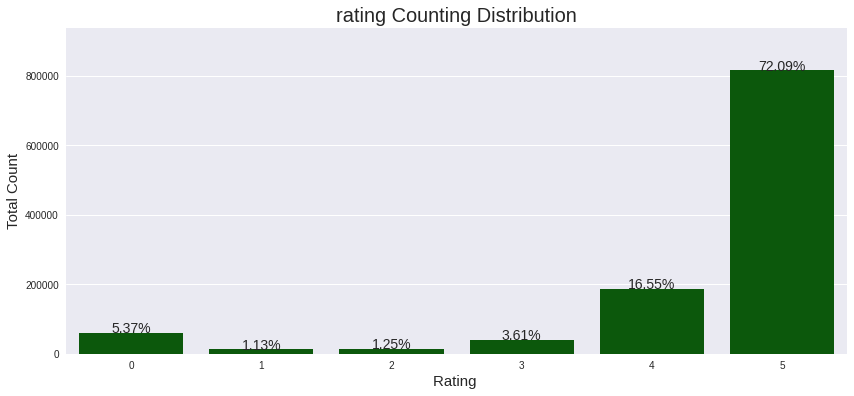

In [3]:
total = len(raw_interact)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating', color='darkgreen',
                  data=raw_interact)
g.set_title("rating Counting Distribution", fontsize=20)
g.set_xlabel("Rating ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

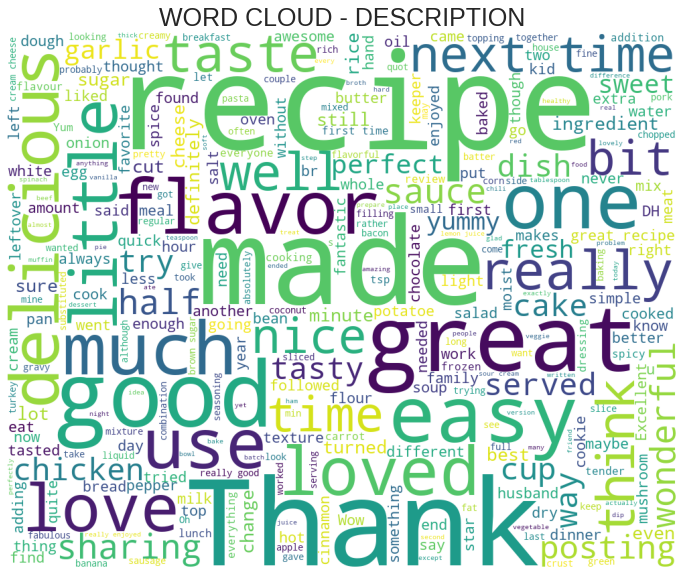

In [4]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['used', "added", "make", 'making',
                 'will', 'using', 'instead',  
                 "add", "might", 'this', 'it','that']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(raw_interact['review'].sample(1500).astype(str)))

fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

# Nettoyage de texte 

In [5]:
%time 
raw_interact['Clean_Reviews'] = raw_interact['review'].str.lower()
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_html_tags_func)
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_url_func)
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_accented_chars_func)
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_punctuation_func)
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_irr_char_func)
raw_interact['Clean_Reviews'] = raw_interact['Clean_Reviews'].apply(remove_extra_whitespaces_func)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.01 µs


/home/minhha/Study/ModIA5/AI_techno/projet_MODIA/text_cleaning.py:76: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()
/home/minhha/Study/ModIA5/AI_techno/projet_MODIA/text_cleaning.py:76: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [6]:
'''
COUNT NUMBER OF WORDS
'''
raw_interact['words_count'] = raw_interact['Clean_Reviews'].apply(word_count_func)

raw_interact[['review','Clean_Reviews', 'words_count']].sample(10)

review  \
790550   I can't believe how good this is.  If you are ...   
1032466  Excellent!!! Had my doubts about the cola- I u...   
575277   Wow this is a wonderful blend of flavors.  I p...   
961497   Awesome - even without the nuts!  Made one loa...   
639736   My husband took a bite of this and said "yum!"...   
259497   Taste easily 5 stars.  However, directions are...   
396447   Delicious!  I used only chicken broth so I omi...   
961882   I always remembered my mom's beef stroganoff a...   
923673   Very quick and easy pork chop recipe that was ...   
631605   This is really good. my kids love this, as do ...   

                                             Clean_Reviews  words_count  
790550   i can t believe how good this is if you are a ...           48  
1032466  excellent had my doubts about the cola i used ...           25  
575277   wow this is a wonderful blend of flavors i pre...           59  
961497   awesome even without the nuts made one loaf an...           20  
639736   my husband took a bite of this and said yum th...          114  
259497   taste easily stars however directions are star...          112  
396447   delicious i used only chicken broth so i omitt...           43  
961882   i always remembered my mom s beef stroganoff a...          117  
923673   very quick and easy pork chop recipe that was ...           46  
631605   this is really good my kids love this as do i ...           30

# Study of reviews of 0 ratings
<a id="2"></a> <br>

<div style="border-radius:10px; border:#DEB887 solid; padding: 2px; background-color: #FFFAF0; font-size:100%; text-align:left; color:black">

David B. : "Faites attention aux notes à 0 elles ne correspondent pas forcément à un sentiment négatif ou positif essayez d'en regarder quelques unes et décider de toutes les supprimer si elles posent problème."

In [7]:
rated_0 = raw_interact[raw_interact.rating==0].reset_index(drop=True)

<div style="border-radius:10px; border:#DEB887 solid; padding: 2px; background-color: #FFFAF0; font-size:100%; text-align:left; color:black">

🤔 En effet, certaines recettes sont malencontreusement notées 0 même si leurs avis sont vraiment positifs en raison de problèmes douteux : 

* Les utilisateurs ont mal cliqué ?


In [8]:
'''
EXEMPLE 
'''
rated_0[rated_0.user_id ==2130022][rated_0.recipe_id ==	277308]

/tmp/ipykernel_497631/3901720362.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rated_0[rated_0.user_id ==2130022][rated_0.recipe_id ==	277308]


user_id  recipe_id       date  rating  \
18078  2130022     277308 2014-01-08       0   

                                                review  \
18078  This was easy and VERY YUMMY!!  Easily 5 stars!   

                                   Clean_Reviews  words_count  
18078  this was easy and very yummy easily stars            8

<div style="border-radius:10px; border:#DEB887 solid; padding: 2px; background-color: #FFFAF0; font-size:100%; text-align:center; color:black">

💡 Nous décidons d'utiliser un modèle pré-entraîné pour filtrer uniquement les avis __vraiment NÉGATIFS__.

In [9]:
'''
LOADING PRETRAINED MODELS 
'''
from transformers import pipeline,AutoTokenizer


# model_id = "Kaludi/Reviews-Sentiment-Analysis"
# model_id = "LiYuan/amazon-review-sentiment-analysis" for rating prediction 
model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_pipeline = pipeline("sentiment-analysis", model = model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
def preprocess_function(text):
    return tokenizer(text, truncation=True)['input_ids']

<div style="border-radius:10px; border:#DEB887 solid; padding: 2px; background-color: #FFFAF0; font-size:100%; text-align:center; color:black">

⚠️ 
Ce modèle pré-entraîné a une limite de longueur de tokens, donc nous allons ignorer les critiques qui ont une longue tokénisation. Heureusement, ces avis ne représentent que moins de __0,01%__ de tous les avis.  

In [11]:
recalculate = False 
if recalculate:
    tokenized_rated_0 = rated_0['Clean_Reviews'].apply(preprocess_function)

    long_tokens = []
    for i in range(len(tokenized_rated_0)):
        if len(tokenized_rated_0.iloc[i]) > 512:
            long_tokens.append(i)

In [12]:
n_rates = len(rated_0)
rated_0['sentiment'] = np.zeros(n_rates)
rated_0['score_sentiment'] = np.zeros(n_rates)

In [13]:
'''
Classer les commentaires en trois catégories : négatifs, neutres et positifs. 
'''
if recalculate:
    ok_tokenization = list(set(range(n_rates)) - set(long_tokens))
    for i in ok_tokenization:
        if i%1000==0:
            print('We classified : \n', i)

        # Extract the current batch.
        clean_reviews = rated_0.loc[i, 'Clean_Reviews']

        sentiment = sentiment_pipeline(clean_reviews)
        
        rated_0.loc[i,'sentiment'] = sentiment[0]['label']
        rated_0.loc[i,'score_sentiment'] = sentiment[0]["score"]
else:
    rated_0 = pd.read_csv('rated_0.csv')

<AxesSubplot:>

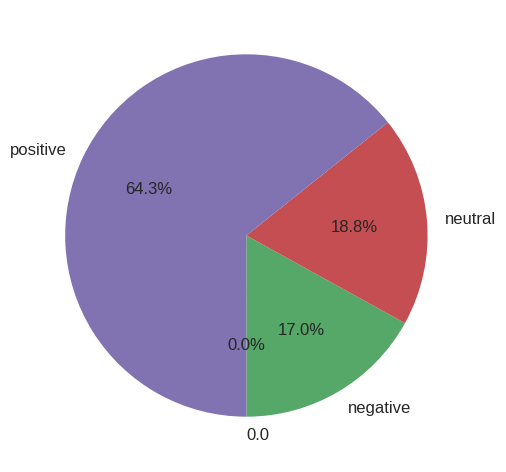

In [14]:
# Compter le nombre de commentaires par sentiment
sentiment_counts = rated_0.groupby(['sentiment']).size()

# Visualiser les sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")


In [15]:
'''
Consultez les commentaires négatifs détectés par le modèle de huggingface 
'''

rated_0[rated_0.sentiment == "negative"][rated_0.score_sentiment >= 0.9][['Clean_Reviews', 'sentiment', 'score_sentiment']].head()

                                        Clean_Reviews sentiment  \
30  yick yick yick no one in my family of five lik...  negative   
58  not an oreo lots of time to make and very disa...  negative   
59  i did not like the taste of this recipe i feel...  negative   
71  i made this using petite sirloin steak and it ...  negative   
92  this recipe was terrible i wouldn t advise any...  negative   

    score_sentiment  
30         0.905093  
58         0.923252  
59         0.914824  
71         0.914728  
92         0.941270  


/tmp/ipykernel_497631/1685406373.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(rated_0[rated_0.sentiment == "negative"][rated_0.score_sentiment >= 0.9][['Clean_Reviews', 'sentiment', 'score_sentiment']].head())


In [16]:
truly_negative_0rated_reviews = rated_0[rated_0.sentiment == "negative"][rated_0.score_sentiment >= 0.9].reset_index(drop=True)

/tmp/ipykernel_497631/1520985065.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  truly_negative_0rated_reviews = rated_0[rated_0.sentiment == "negative"][rated_0.score_sentiment >= 0.9].reset_index(drop=True)


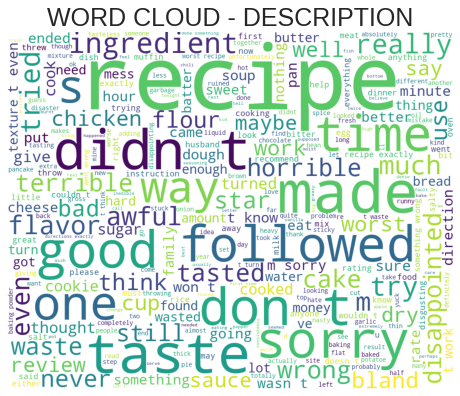

In [17]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(truly_negative_0rated_reviews.Clean_Reviews.astype(str)))

fig = plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

In [18]:
'''
Consultez les commentaires neutres détectés par le modèle de huggingface 
'''

rated_0[rated_0.sentiment == "neutral"][rated_0.score_sentiment >= 0.9][['Clean_Reviews', 'sentiment', 'score_sentiment']].head()

/tmp/ipykernel_497631/2381020980.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rated_0[rated_0.sentiment == "neutral"][rated_0.score_sentiment >= 0.9][['Clean_Reviews', 'sentiment', 'score_sentiment']].head()


Clean_Reviews sentiment  \
7             do you have cook the potatoes beforehand   neutral   
103              can you put in pint jars and let seal   neutral   
400  add the sugar to the dry ingredients before cu...   neutral   
642  to stop your paddles from sticking in bread ri...   neutral   
672  can you make this the night before and keep in...   neutral   

     score_sentiment  
7           0.903264  
103         0.906060  
400         0.935420  
642         0.902192  
672         0.937056

# Classify ratings to POSITIVE and NEGATIVE 

In [19]:
raw_interact['sentiment']  = 1* (raw_interact.rating.values > 3)
raw_interact = raw_interact.replace({'sentiment': {1: 'positive', 0: 'negative'}})
df = raw_interact.copy()
df = df[df.rating != 0].reset_index(drop=True)
df = pd.concat([df, truly_negative_0rated_reviews], ignore_index=True)
df = df[['user_id', 'recipe_id', 'date', 'rating', 'review',
          'Clean_Reviews', 'words_count', 'sentiment']]

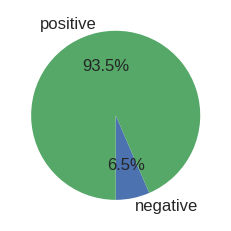

In [20]:
# Compter le nombre de commentaires par sentiment
sentiment_counts = df.groupby(['sentiment']).size()
# Visualiser les sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(121)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

plt.show()


# Predict whether user like/dislike 

## Vectorization

In [21]:
'''
TRAIN TEST IMPORTATION 
'''

'''interact_train = pd.read_csv('data/interactions_train.csv').drop(columns=['u', 'i'])
interact_train.rating = interact_train.rating.astype(int)
interact_train.date = pd.DatetimeIndex(interact_train['date'])

interact_test = pd.read_csv('data/interactions_test.csv').drop(columns=['u', 'i'])
interact_test.rating = interact_test.rating.astype(int)
interact_test.date = pd.DatetimeIndex(interact_test['date'])

train = interact_train.merge(raw_interact, how='inner', on=['user_id', 'recipe_id', 'date', 'rating'])
test  = interact_test.merge(raw_interact, how='inner', on=['user_id', 'recipe_id', 'date', 'rating'])'''

"interact_train = pd.read_csv('data/interactions_train.csv').drop(columns=['u', 'i'])\ninteract_train.rating = interact_train.rating.astype(int)\ninteract_train.date = pd.DatetimeIndex(interact_train['date'])\n\ninteract_test = pd.read_csv('data/interactions_test.csv').drop(columns=['u', 'i'])\ninteract_test.rating = interact_test.rating.astype(int)\ninteract_test.date = pd.DatetimeIndex(interact_test['date'])\n\ntrain = interact_train.merge(raw_interact, how='inner', on=['user_id', 'recipe_id', 'date', 'rating'])\ntest  = interact_test.merge(raw_interact, how='inner', on=['user_id', 'recipe_id', 'date', 'rating'])"

In [22]:
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(df.Clean_Reviews.values, df.sentiment, test_size= 0.2, 
                                                          random_state=20)

In [23]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
# Download stopwords list

stop_words = set(stopwords.words('english'))  | {
    "recipe",  "flour",
    "made", "food", "cup", "give", 'make', 'chicken',
    'used', 'mustard', 'pesto', 'this', 'that', 'cake'
}


# Interface lemma tokenizer from nltk with sklearn
class StemTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`', '&#039;']
    def __init__(self):
        self.stemmer = SnowballStemmer('english')
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) if t not in self.ignore_tokens]

tokenizer=StemTokenizer()

[nltk_data] Downloading package punkt to /home/minhha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/minhha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Lemmatize the stop words
token_stop = tokenizer(' '.join(stop_words))

# Create TF-idf model
tfidf = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, max_features=2000)

#Construct the required TF-IDF matrix by fitting and transforming the data
# vec_train = tfidf.fit_transform(text_train)
# vec_test  = tfidf.transform(text_test)

# Build predictive model 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,classification_report
import pickle 
import joblib

with open('pipeline_part2.pkl', 'rb') as fo:  
   model = joblib.load(fo)


In [26]:
predictions = model.predict(text_test)



Model trained on full training dataset
Accuracy score: 0.99
Classification report 
               precision    recall  f1-score   support

    negative       0.99      0.85      0.91     14141
    positive       0.99      1.00      0.99    200524

    accuracy                           0.99    214665
   macro avg       0.99      0.92      0.95    214665
weighted avg       0.99      0.99      0.99    214665



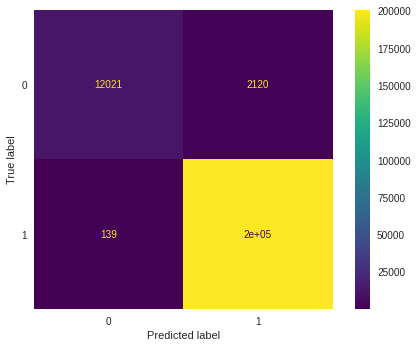

In [27]:
print('Model trained on full training dataset')
print(f"Accuracy score: {accuracy_score( y_test, predictions):.2f}")
print('Classification report \n',classification_report(y_test, predictions, labels = ['negative','positive']))
cm = confusion_matrix(y_test, predictions, labels = ['negative','positive'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

# Explain predictive model with LIME 

In [28]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['negative', 'positive'])

In [29]:
idx = 56
exp = explainer.explain_instance(text_test[idx], model.predict_proba)
print('True class: %s' % list(y_test)[idx])
exp.show_in_notebook(text=True)

True class: negative


# Under-sampling 

In [30]:
from imblearn.pipeline       import Pipeline 
from sklearn.model_selection import cross_validate
from imblearn.over_sampling  import RandomOverSampler
from sklearn.metrics import precision_score
import random 

In [31]:
with open('less_imbalanced_model.pkl', 'rb') as fo:  
   model_balanced = joblib.load(fo)

In [32]:
percent = 0.3

idx_positive = np.where(np.array(y_train) == 'positive')[0]

sub_idx = random.sample(list(idx_positive), int(len(idx_positive)*percent))
sub_text_train_pos, sub_y_train_pos = text_train[sub_idx], y_train.values[sub_idx]

sub_text_train_negative = text_train[np.where(np.array(y_train)=='negative')]
sub_text_train = np.concatenate([sub_text_train_negative, sub_text_train_pos])

sub_y_train_negative = np.array(['negative']*len(sub_text_train_negative))
sub_y_train  = np.concatenate([sub_y_train_negative, sub_y_train_pos])


perm = np.random.permutation(len(sub_text_train))
sub_text_train = sub_text_train[perm]
sub_y_train    = sub_y_train[perm] 

Model trained on full training dataset
Accuracy score: 0.98
Classification report 
               precision    recall  f1-score   support

    negative       0.81      0.91      0.86     14141
    positive       0.99      0.98      0.99    200524

    accuracy                           0.98    214665
   macro avg       0.90      0.95      0.92    214665
weighted avg       0.98      0.98      0.98    214665



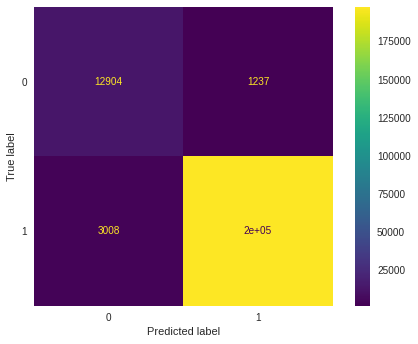

In [33]:
predictions = model_balanced.predict(text_test)

print('Model trained on full training dataset')
print(f"Accuracy score: {accuracy_score( y_test, predictions):.2f}")
print('Classification report \n',classification_report(y_test, predictions, labels = ['negative','positive']))
cm = confusion_matrix(y_test, predictions, labels = ['negative','positive'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [34]:
idx = 34
exp = explainer.explain_instance(text_test[idx], model_balanced.predict_proba)
print('True class: %s' % list(y_test)[idx])
exp.show_in_notebook(text=True)

True class: positive


In [35]:
idx = 18
text = 'This cake is pretty good.'
exp = explainer.explain_instance(text, model_balanced.predict_proba)
exp.show_in_notebook(text=True)

In [36]:
text = 'This cake is not that good. Sorry'
exp = explainer.explain_instance(text, model_balanced.predict_proba)
exp.show_in_notebook(text=True)